In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [6]:
img = cv2.imread('/content/melanome.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

binary_complement = cv2.bitwise_not(binary)

dist_transform = cv2.distanceTransform(binary_complement, cv2.DIST_L2, 5)

dist_gray = cv2.normalize(dist_transform, None, 0, 255, cv2.NORM_MINMAX)
dist_gray = dist_gray.astype(np.uint8)

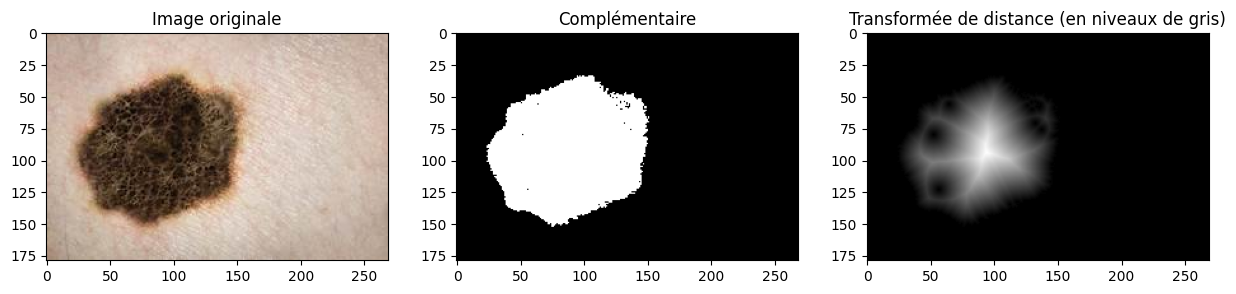

In [9]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.title("Image originale")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

plt.subplot(1,3,2)
plt.title("Complémentaire")
plt.imshow(binary_complement, cmap='gray')

plt.subplot(1,3,3)
plt.title("Transformée de distance (en niveaux de gris)")
plt.imshow(dist_gray, cmap='gray')
plt.show()


In [10]:
img = cv2.imread('/content/BLOOD1.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

binary_complement = cv2.bitwise_not(binary)

dist_transform = cv2.distanceTransform(binary_complement, cv2.DIST_L2, 5)

dist_gray = cv2.normalize(dist_transform, None, 0, 255, cv2.NORM_MINMAX)
dist_gray = dist_gray.astype(np.uint8)

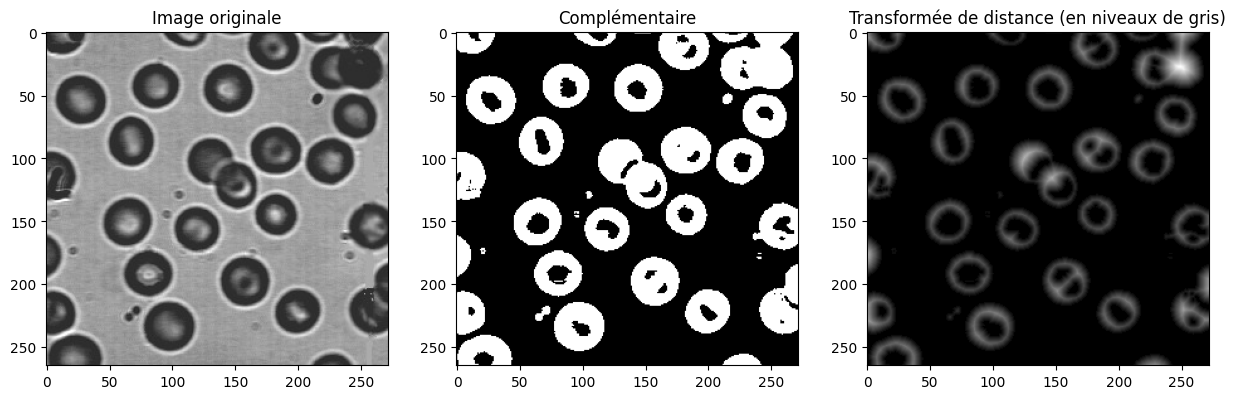

In [11]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.title("Image originale")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

plt.subplot(1,3,2)
plt.title("Complémentaire")
plt.imshow(binary_complement, cmap='gray')

plt.subplot(1,3,3)
plt.title("Transformée de distance (en niveaux de gris)")
plt.imshow(dist_gray, cmap='gray')
plt.show()


In [28]:
img = cv2.imread('/content/MC170021.JPG')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

images = []
for r in range(1, 6):  # rayon = 1 à 5
    se = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15*r+1, 15*r+1))
    opened = cv2.morphologyEx(binary_complement, cv2.MORPH_OPEN, se)
    images.append((r, opened))

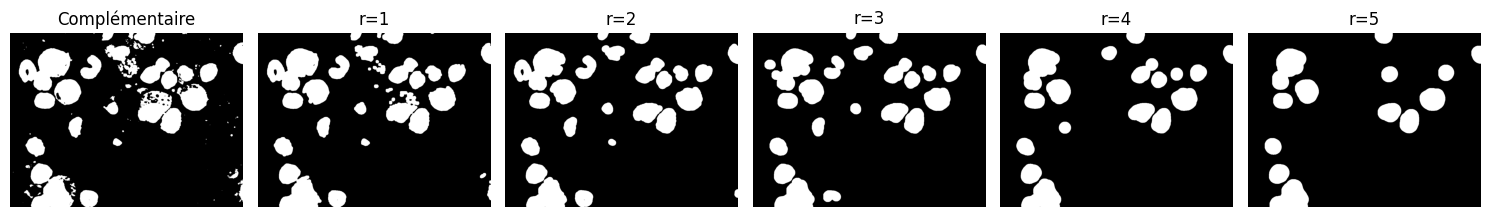

In [29]:

plt.figure(figsize=(15, 5))

plt.subplot(1, 6, 1)
plt.imshow(binary_complement, cmap='gray')
plt.title("Complémentaire")
plt.axis('off')

for i, (r, opened) in enumerate(images):
    plt.subplot(1, 6, i+2)
    plt.imshow(opened, cmap='gray')
    plt.title(f"r={r}")
    plt.axis('off')

plt.tight_layout()
plt.show()

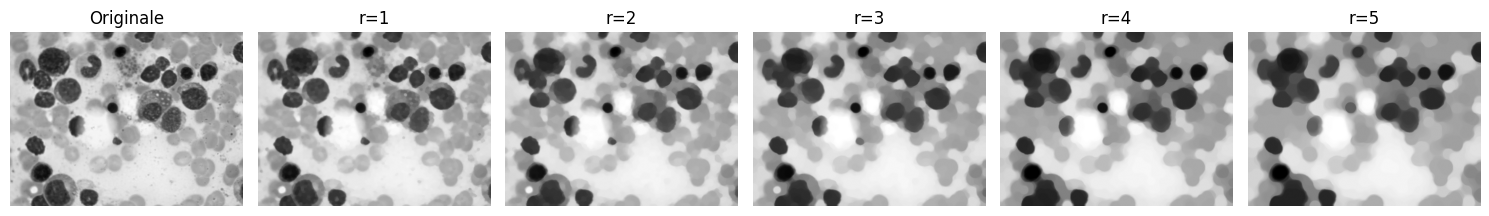

In [37]:
#filtre blanc sur blood
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

max_radius = 5
images = []

asf = gray.copy()

for r in range(1, max_radius + 1):
    se = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (10*r+1, 10*r+1))

    # Filtre blanc : ouverture puis fermeture
    opened = cv2.morphologyEx(asf, cv2.MORPH_OPEN, se)
    closed = cv2.morphologyEx(opened, cv2.MORPH_CLOSE, se)

    asf = closed.copy()
    images.append((r, asf))

cols = 5
plt.figure(figsize=(15,5))

plt.subplot(1, max_radius+1, 1)
plt.imshow(gray, cmap='gray')
plt.title("Originale")
plt.axis('off')

for i, (r, img_asf) in enumerate(images):
    plt.subplot(1, max_radius+1, i+2)
    plt.imshow(img_asf, cmap='gray')
    plt.title(f"r={r}")
    plt.axis('off')

plt.tight_layout()
plt.show()


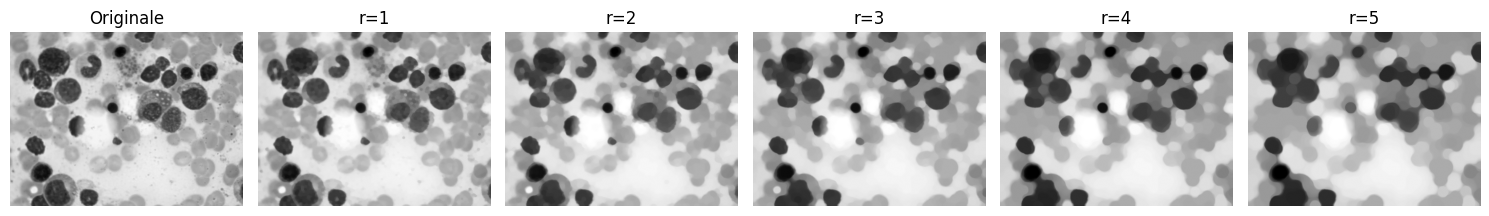

In [36]:
#filtre noir sur blood
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

max_radius = 5
asf = gray.copy()
images = []

for r in range(1, max_radius+1):
    se = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (10*r+1, 10*r+1))

    # Filtre noir : fermeture puis ouverture
    closed2 = cv2.morphologyEx(asf, cv2.MORPH_CLOSE, se)
    opened2 = cv2.morphologyEx(closed2, cv2.MORPH_OPEN, se)

    asf = opened2.copy()
    images.append((r, asf))

cols = 5
plt.figure(figsize=(15,5))

plt.subplot(1, max_radius+1, 1)
plt.imshow(gray, cmap='gray')
plt.title("Originale")
plt.axis('off')

for i, (r, img_asf) in enumerate(images):
    plt.subplot(1, max_radius+1, i+2)
    plt.imshow(img_asf, cmap='gray')
    plt.title(f"r={r}")
    plt.axis('off')

plt.tight_layout()
plt.show()


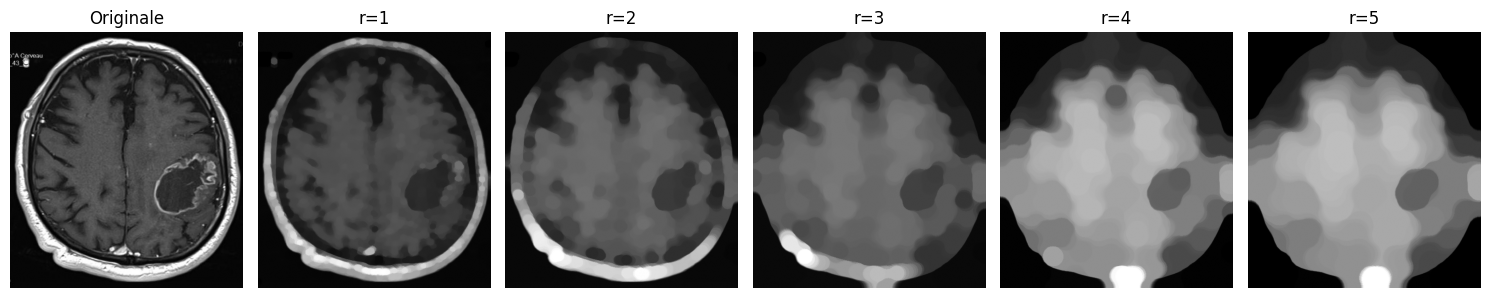

In [38]:
#filtre blanc sur brain
img = cv2.imread('/content/RMS_516_821_fig01_i1200.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

max_radius = 5
images = []

asf = gray.copy()

for r in range(1, max_radius + 1):
    se = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (10*r+1, 10*r+1))

    # Filtre blanc : ouverture puis fermeture
    opened = cv2.morphologyEx(asf, cv2.MORPH_OPEN, se)
    closed = cv2.morphologyEx(opened, cv2.MORPH_CLOSE, se)

    asf = closed.copy()
    images.append((r, asf))

cols = 5
plt.figure(figsize=(15,5))

plt.subplot(1, max_radius+1, 1)
plt.imshow(gray, cmap='gray')
plt.title("Originale")
plt.axis('off')

for i, (r, img_asf) in enumerate(images):
    plt.subplot(1, max_radius+1, i+2)
    plt.imshow(img_asf, cmap='gray')
    plt.title(f"r={r}")
    plt.axis('off')

plt.tight_layout()
plt.show()


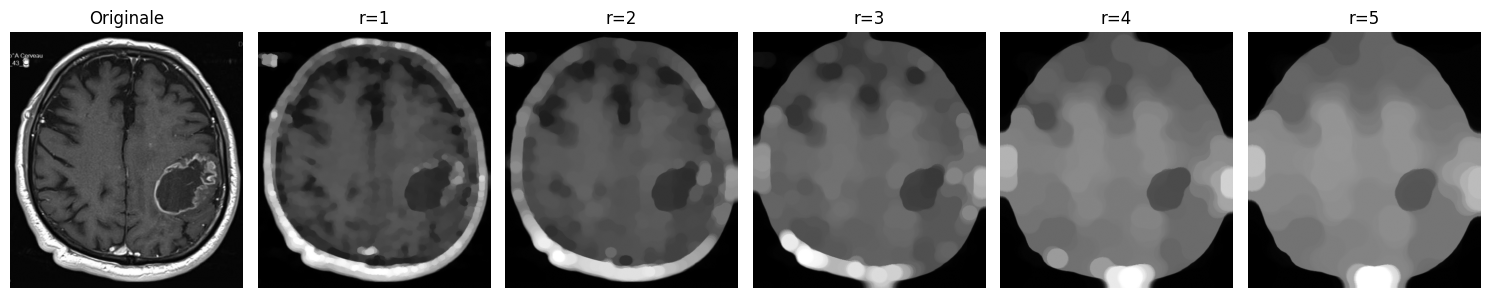

In [39]:
#filtre noir sur brain
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

max_radius = 5
asf = gray.copy()
images = []

for r in range(1, max_radius+1):
    se = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (10*r+1, 10*r+1))

    # Filtre noir : fermeture puis ouverture
    closed2 = cv2.morphologyEx(asf, cv2.MORPH_CLOSE, se)
    opened2 = cv2.morphologyEx(closed2, cv2.MORPH_OPEN, se)

    asf = opened2.copy()
    images.append((r, asf))

cols = 5
plt.figure(figsize=(15,5))

plt.subplot(1, max_radius+1, 1)
plt.imshow(gray, cmap='gray')
plt.title("Originale")
plt.axis('off')

for i, (r, img_asf) in enumerate(images):
    plt.subplot(1, max_radius+1, i+2)
    plt.imshow(img_asf, cmap='gray')
    plt.title(f"r={r}")
    plt.axis('off')

plt.tight_layout()
plt.show()
